Если вы занимаетесь машинным обучением, то возможно вы слышали про теорему "об отсутствии бесплатных завтраков" (no-free-lunch). Иногда отправляют ссылку на нее, когда возникает вопрос о том, какой из двух алгоритмов лучше. После этого вопрос считается исчерпанным. Возможно вы даже видели одну из формулировок этой теоремы, впечатлялись и надолго задумывались: глубоко...

Часто упоминают о связи no-free-lunch теоремы с априорными предположениями и регуляризацией.

Давайте попробуем сдернуть завесу тайны с этих вещей. Далее - необходимая для понимания теоремы теория и ход доказательства теоремы (оно настолько простое, что формул не понадобится). Иногда в зарубежных статьях встречаются и такие понятия как *inductive prior* и *inductive bias* ~напоминающие загадку Сфинкса~, эти понятия мы тоже разберем. Можете сразу посмотреть резюме, там перечислены все основные идеи из статьи.

### Пререквизиты: повторение теории

Ниже кратко излагается теория, необходимая для понимания no-free-lunch теоремы. В основном это просто набор определений, которыми мы будем дальше пользоваться.

Здесь мы будем рассматривать так называемый статистический подход к обучению (**statistical learning framework**). Это формализация задачи обучения с учителем. Более подробно об этом можно почитать в [книге Шая Шалева-Шварца о машинном обучении]($Understanding Machine Learning: From Theory to Algorithms$), раздел 2 "A gentle Start".

#### Домен и порождающее распределение

Прежде всего рассмотрим понятие "домена". В задаче обучения с учителем **домен исходных данных** - это множество всех возможных исходных данных, *домен целевых данных* - это множество всех возможных целевых данных. Например, в задаче регрессии с N количественными признаками домен исходных данных - ${\rm I\!R}^N$, домен целевых данных - ${\rm I\!R}$. Некоторые сочетания признаков из ${\rm I\!R}^N$ могут быть невозможными, поэтому доменом можно считать некое подмножество ${\rm I\!R}^N$.

В более общем случае мы рассматриваем не домен исходных данных, а **порождающее распределение** - распределение вероятностей на домене исходных данных. Это значит, что каждому элементу из домена сопоставлена вероятность появления (в дискретном случае) или плотность вероятности (в непрерывном случае). То есть какие-то элементы из домена более вероятны, а какие-то менее вероятны. В простом случае можно считать, что все элементы из домена равновероятны. В этом случае выборка данных - это выборка из порождающего распределения, то есть набор независимых одинаково распределенных случайных величин (independent and identically distributed, **i. i. d.** random variables).

> Примечание: в общем случае порождающее распределение может включать не только исходные, но и целевые данные. В более простом случае можно считать, что целевые данные однозначно определяются исходными данными, и порождающее распределение - это распределение исходных данных. Такой случай мы и рассматриваем.

Как правило, домен исходных данных содержит бесконечное количество элементов (например, ${\rm I\!R}^N$). Но если выполнить дискретизацию каждого вещественнозначного признака с произвольно малым шагом и ограничить все значения сверху и снизу, то количество элементов в домене станет конечным. Это замечание важно потому, что no-free-lunch теорема рассматривает именно домены с конечным числом элементов.

#### Целевая функция и обчаемый алгоритм

Задачу обучения можно сформулировать в виде **целевой функции**, отображающую исходные данные в целевые - $f: X \rightarrow Y$. Целевая функция - это и есть истинная зависимость, которую нам нужно выявить. Задачи обучения с учителем решаются с помощью **обучаемого алгоритма (learner)**, например нейронной сети или градиентного бустинга. Это понятие включает в себя архитектуру (модель) и процесс обучения. Learner обучается на выборке данных из порождающего распределения и возвращает результат - готовый алгоритм, решающий задачу (называемый **предиктором**, или гипотезой). Здесь важно отметить, что learner не обязательно использует всю выборку для обучения. Часть выборки он может отложить и использовать для валидации, выбирая с ее помощью наилучший предиктор.

#### Генерализация

Для оценки предиктора мы используем метрику качества, например MSE или accuracy. Метрику качества на некой выборке можно посчитать простым усреднением метрики качества на каждом примере из выборки. Матожидание метрики качества предиктора на всем порождающем распределении является мерой качества предиктора, или мерой **генерализации** (обобщения). Эту метрику мы и стремимся улучшить, однако напрямую посчитать ее мы не можем, так как обычно имеем только конечную выборку из порождающего распределения. Мы можем лишь оценить эту метрику с помощью тестовой выборки.

> Примечание: интересна также задача достижения out-of-distribution генерализации. Эта задача не вписывается в традиционный статистический подход к обучению (statistical learning framework), описанный здесь. Тем не менее, Йошуа Бенжио считает out-of-distribution генерализацию важной для достижения ИИ уровня человеческого сознания (см. статью A. Goyal, Y. Bengio: [Inductive Biases for Deep Learning of Higher-Level Cognition]($Inductive Biases for Deep Learning of Higher-Level Cognition$), 2020).

Мы можем рассмотреть простой случай, когда домен конечен и все примеры из домена равновероятны, а задачей является бинарная классификация. Пусть мы имеем некий предиктор - результат обучения learner'а. **Ошибка генерализации** этого предиктора равна доле неверно угаданных примеров среди всех примеров из домена. Такой случай и рассматривается в no-free-lunch теореме.

#### Оценка качества алгоритма на задаче

Таким образом, имея целевую функцию (т. е. задачу) $f: X \rightarrow Y$, обучаемый алгоритм $A$ и обучающую выборку данных $S$ мы получаем предиктор $A(S)$, который имеет некую ошибку генерализации. Если мы хотим оценить насколько хорошо в целом обучаемый алгоритм решает данную задачу, то нам нужно абстрагироваться от конкретной обучающей выборки. Поэтому мы можем ввести понятие **матожидания ошибки генерализации алгоритма $A$ на данной задаче $f$ по всем обучающим выборкам заданного размера m**: $M(A, f, m)$. Это можно пояснить так: если мы $N$ раз возьмем из порождающего распределения выборку размером $m$, обучим на ней алгоритм $A$ и посчитаем среднюю *ошибку генерализации* предиктора по всем попыткам, то с ростом $N$ это значение будет стремиться к $M(A, f, m)$. Иными словами, матожидание ошибки генерализации - это значение, показывающее, насколько хорошо алгоритм подходит для решения данной задачи.

> Примечание: похожим образом определяются понятия bias и variance обучаемого алгоритма. Рекомендую почитать об этих понятиях [здесь]($Дилемма смещения–дисперсии$). Хотя сложность формул поначалу может отпугнуть, но это одно из немногих мест, где данные понятия расписаны математически строго и не оставляя двусмысленности.

Теперь повторение необходимой теории закончилось и мы можем перейти к самой теореме.

### No-free-lunch теорема

Есть несколько близких теорем, называемых теоремами no-free-lunch. Рассмотрим одну из формулировкок.

**No-free-lunch теорема (вариант 1).** Пусть мы имеем домен исходных данных $X$ конечного размера и обучаемый алгоритм $A$ для задачи бинарной классификации. Также зафиксируем число $m < |X|/2$ - размер обучающей выборки. Существует такое порождающее распределение $D$ на домене $X$ и целевая функция $f: X \rightarrow \{0, 1\}$, что с вероятностью как минимум 1/7 алгоритм $A$, обученный на случайной выборке размера m из распределения $D$, будет иметь ошибку генерализации выше 1/8.

Эта формулировка теоремы выглядит несколько запутанной, и доказывается она через более простое утверждение, которое можно считать альтернативной формулировкой теоремы:

**No-free-lunch теорема (вариант 2).** Пусть мы имеем домен исходных данных $X$ конечного размера и обучаемый алгоритм $A$ для задачи бинарной классификации. Также зафиксируем число $m < |X|/2$ - размер обучающей выборки. Существует такая целевая функция $f: X \rightarrow \{0, 1\}$, что матожидание ошибки генерализации алгоритма на данной задаче по всем обучающим выборкам размера m больше либо равно 1/4.

Важно понять, что в теореме мы абстрагируемся от понятия "исходный признак" (бинарный, категориальный, порядковый и т. д.) - для нас этого не существует. Вместо этого мы рассматриваем совершенно произвольные зависимости $f: X \rightarrow \{0, 1\}$, где элементами множества $X$ являются объекты со всеми имеющимися признаками. Получить такую зависимость мы можем, например, случайно присвоив всем элементам из $X$ значения 0 или 1. Тогда получится, что наши метки классов - это случайный шум. Но может быть и такое, что $f$ - это некая осмысленная зависимость.

### Идея доказательства

Доказательство можно найти в упомянутой выше [книге]($Understanding Machine Learning: From Theory to Algorithms$) в разделе 5.1 "The No-Free-Lunch Theorem". При этом используются обозначения, данные в разделе 2.1 "A Formal Model". Для иллюстрации, доказательство выглядит так:

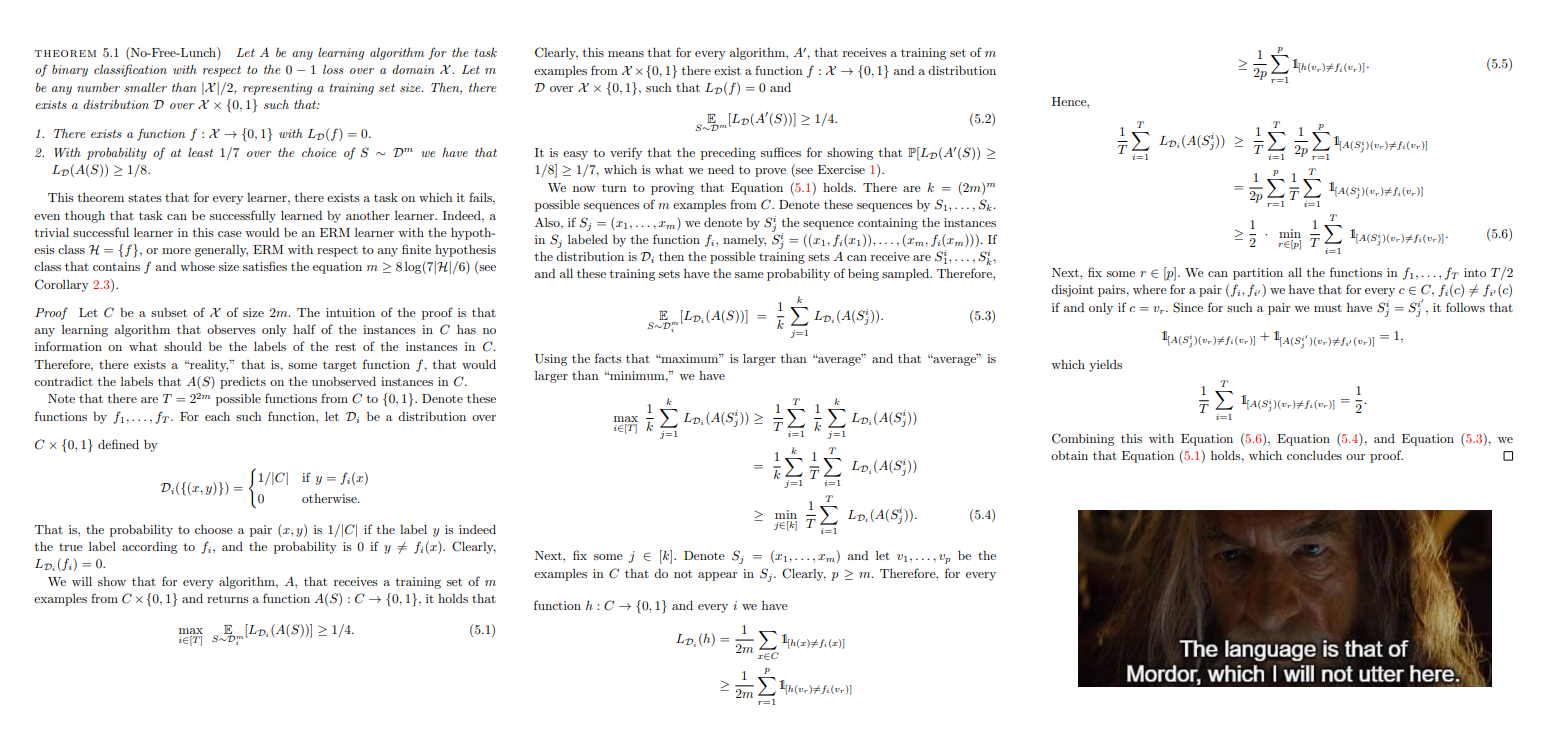

Разобраться в нем и уловить его суть непросто из-за достаточно сложной нотации, но по существу доказательство не сложное. Здесь мы рассмотрим основную идею доказательства. Те, кто хочет разобраться детальнее, могут сопоставить изложенные ниже пояснения с формулами в источнике.

Ключевым в доказательстве является последнее выражение. Пусть мы имеем некое фиксированное деление всего домена на обучающую выборку $S$ и "остаток" домена $N$. Тогда ошибка предиктора $A(S_f)$ на остатке домена $N_f$, *усредненная по всем мыслимым целевым функциям* $f: X \rightarrow {0, 1}$, равна $1/2$. Здесь нижний индекс $f$ означает разметку данных согласно целевой функции $f$. 

Это утверждение в целом очевидно: подавляющее большинство целевых функций $f$ будет случайным шумом, при котором обучающие данные никак не помогут в предсказании тестовых.

Если средняя ошибка на остатке домена $N_f$ равна $1/2$, то средняя ошибка на всем домене будет не менее $1/4$ (так как по условию теоремы размер обучающей выборки составляет не более половины размера домена).

Утверждения выше формулируются для фиксированной обучающей выборки. Но если для каждой выборки (средняя по всем целевым функциям) ошибка не менее $1/4$, то средняя по всем выборкам и всем целевым функциям ошибка также не менее $1/4$. Отсюда: существует такая целевая функция, что средняя ошибка по всем выборкам не менее $1/4$, что и требовалось доказать.

### Обсуждение теоремы

По сути теорема говорит о том, что для любого обучаемого алгоритма можно подобрать "плохую" функцию, для которой матожидание ошибки будет высоким. И даже в среднем по всем функциям ошибка генерализации не впечатляет: не менее 25% ошибок. Это значение складывается из 0% ошибок на обучающей выборке (оценка снизу) и 50% ошибок на других примерах из домена. Иными словами, теорема говорит: в среднем по всем мыслимым зависимостям $f: X \rightarrow {0, 1}$ точность на остатке домена получается не лучше случайного угадывания.

Конечно, no-free-lunch теорема кажется несколько оторванной от реальности. Как минимум очевидно, что класс всех значимых зависимостей реального мира, могущих быть предметом исследования, намного уже, чем класс *всех возможных математических функций*. Если целевая функция напоминает случайный шум, то никакой алгоритм здесь не справится, и это не потому, что все алгоритмы "плохие", а скорее потому, что наши данные не отражают какую-либо реальную зависимость.

Основной смысл no-free-lunch теоремы в том, что она теоретически обосновывает необходимость **априорных предположений (priors)** в машинном обучении. Здесь прослеживается явная параллель с байесовским статистическим выводом, в котором новые знания всегда строятся не на пустом месте, а на основе предыдущих знаний.

### Априорные гипотезы в машинном обучении

Вероятно читатель знает о таком понятии, как регуляризация. И возможно слышал такие термины, как inductive prior и inductive bias. Здесь идет речь о знаниях о мире, известных a priori (до эксперимента). Вопреки распространенной трактовке, a priori не всегда означает некую аксиому. Это означает *сделанную заранее гипотезу, которая затем корректируется на основе экспериментальных данных, из чего возникает апостериорная гипотеза* (a posteriori - "постфактум"). Это принцип байесовского вывода.

### Гипотеза компактности

В машинном обучении почти всегда основной априорной гипотезой является **гипотеза компактности**. Она предполагает, что **близкие по исходным признакам объекты вероятно близки и по целевому признаку**. Например, в задаче классификации схожие объекты гораздо чаще лежат в одном классе. Иначе говоря, целевая функция в каком-то смысле плавная. Данная формулировка неформальная, формализовать ее можно по-разному. В домене исходных данных нужно ввести некую метрику расстояния, позволяющую сравнивать объекты по близости друг к другу, иначе гипотеза компактности не будет иметь смысла.

Вспомним, что в доказательстве no-free-lunch теоремы мы наблюдали прямо противоположное: целевые функции в среднем представляли собой случайный шум, явно несоответствующий гипотезе компактности. Отсюда мы и получали среднюю ошибку 50% при тестировании любого алгоритма.

Различие между числовым и категориальным признаком в том, что к числовому признаку следует применить гипотезу компактности.

**Практический вывод #1.** Если мы работаем с признаками, которые по смыслу являются числовыми, то гипотезу компактности нужно заложить в сам обучаемый алгоритм: небольшое изменение признака ведет к небольшому изменению предсказания. Если числовой признак представлен в компьютере виде числа, то линейные модели, SVM, нейросети, решающие деревья (и вероятно все другие применяемые алгоритмы) исходя из принципа их работы будут соответствовать гипотезе компактности (деревья решений могут не соответствовать лишь в отдельных точках). А значит все хорошо, так и нужно.

Попробуйте в задаче регрессии заменить каждый числовой признак на набор бинарных признаков, означающих отдельные биты при записи этого числа в формате float. Информация при этом не будет потеряна, однако качество обучения нейросети или SVM на таких данных будет существенно хуже. Потому что теперь в алгоритме не реализована гипотеза компактности. Например, нейросеть так устроена, что *небольшое изменение входных данных незначительно меняет ответ*, потому что нейросеть - это суперпозиция непрерывных функций. А это и есть гипотеза компактности, заложенная в сам обучаемый алгоритм.

> Примечание: изредка случается, что небольшое изменение входных данных в нейросети сильно меняет ответ. Речь идет об adversarial examples в нейронных сетях для классификации изображений. Этот феномен описан в статье [Intriguing properties of neural networks](https://arxiv.org/abs/1312.6199) (C. Szegedy et al., 2013) на которую я делал [обзор]($Intriguing properties of neural networks$). В статье авторы как раз и рассуждают о гипотезе компактности (smoothness prior). Это тот случай, когда предиктор не полностью соответствует гипотезе компактности, что является его недостатком.

**Практический вывод #1.** К категориальным признакам не следует применять гипотезу компактности. Все категории (в простом случае) одинаково не равны друг на другу. Именно поэтому категориальные признаки перед обработкой нейронной сетью преобразуются one-hot кодированием. Целевые категориальные признаки также кодируются one-hot кодированием.

Попробуйте в задаче классификации цифр MNIST нейросетью вместо 10 выходных нейронов использовать лишь один выходной нейрон, который непосредственно предсказывает цифру (округляем значение на нем), и использовать функцию потерь MSE. Такая сеть кое-как обучится, но точность будет сильно ниже.



Именно в этом суть отличия задачи **классификации** от **регрессии**. Различие не просто в формате данных: формат мы можем сделать таким, каким захотим. Различие в нашем априорном знании о целевом признаке. В регрессии небольшая ошибка в ответе лучше большой ошибки: при оценке стоимости предсказать 8 вместо 9 лучше, чем предсказать 1 вместо 9. В классификации все классы одинаково непохожи: при распознавании цифр предсказать 8 вместо 9 в той же мере является ошибкой, что и предсказать 1 вместо 9. Эта информация закладывается в архитектуру модели и функцию потерь.

### Гипотеза о сложности алгоритмов

Описанная выше гипотеза может показаться слишком банальной. Есть кстати и еще одна "банальная" гипотеза: бритва Оккама: простое объяснение при прочих равных предпочтительнее сложного. Об этом принципе хорошо написано в Википедии:

> "Сам Оккам писал: «Что может быть сделано на основе меньшего числа [предположений], не следует делать, исходя из большего». Бритва Оккама не аксиома, а презумпция, то есть она не запрещает более сложные объяснения в принципе, а лишь рекомендует порядок рассмотрения гипотез, который в большинстве случаев является наилучшим."

В машинном обучении бритва Оккама означает, что на реальных задачах с ростом сложности модели возникает риск переобучения, потому что модель слишком "подгоняется" под обучающие данные. Это, впрочем, не всегда так (например см. [эту статью]($A Modern Take on the Bias-Variance Tradeoff in Neural Networks$)), и вообще в ML к любым утверждениям стоит относиться с осторожностью.

*Примечание.* Как мне кажется, переобучение не всегда связано с излишней сложностью гипотез. Может быть и наоборот. Простая сверточная сеть распознает леопарда по пятнам на его шкуре, практически игноррируя его форму как объекта. Это отлично работает на обучающем и тестовом датасетах, где кроме леопардов больше нет объектов леопардовой расцветки. Однако, например, леопардовый диван такая сеть распознает как леопарда. Это тоже можно считать переобучением. Подробнее можно почитать здесь и здесь:

- [Внезапный диван леопардовой расцветки](https://habr.com/ru/post/259191/)
- [Нейронные сети предпочитают текстуры и как с этим бороться](https://habr.com/ru/company/ods/blog/453788/)

### А есть гипотезы посложнее?

Начнем с того, что L2-регуляризация весов (а также weight decay в нейронных сетях - эти два понятия очень близки, но полностью отождествлять их [некорректно]($Decoupled Weight Decay Regularization$)) экивалентна априорному нормальному распределения весов модели, а L1-регуляризация весов эквивалентна априорному распределению Лапласа. Об этом можно подробнее почитать в замечательной [статье](https://habr.com/ru/company/ods/blog/322076/) на хабре о базовых принципах машинного обучения.

В статье [Inductive Biases for Deep Learning of Higher-Level Cognition]($Inductive Biases for Deep Learning of Higher-Level Cognition$) авторы приводят целый ряд индуктивных предположений о свойствах данных, заложенных в алгоритмы:

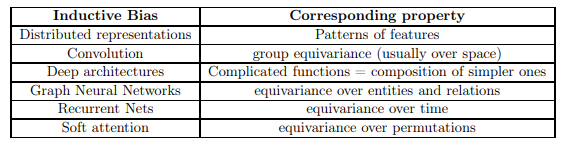

**Distributed representations: Patterns of features.** Приблизительно это означает следующее: объект описывается набором свойств, которые могут быть закодированы в виде вектора чисел (если честно, этот пункт не до конца понимаю).

**Convolution: group equivariance (usually over space).** Если сдвинуть входное изображение, то аналогичным образом сдвинется, но не изменится выход сверточного слоя (если не рассматривать краевые эффекты). Это значит, что элементы изображения обрабатываются одинаково независимо от их положения: свойство трансляционной эквивариантности. Трансляция = сдвиг, эквивариантность - свойство функции $f$ относительно класса функций $G$: $\forall g \in G: f(g(x)) = g(f(x))$ [[источник](https://distill.pub/2020/circuits/equivariance/)]. Если последним слоем будет глобальный пулинг, то получим инвариантность к сдвигам. Следует заметить, что сверточные сети все же не обладают естественными для изображений свойствами эквивариантности к поворотам и масштабированию, а так не умеют делать вывод о типе объекта по форме, игнорируя текстуру, а значит есть потенциал для улучшения.

**Deep architectures: Complicated functions = composition of simpler ones.** Сложные функции можно представить как композицию более простых, чему соответствуют нейронные сети с их последовательностью слоев.

**Graph Neural Networks: equivariance over entities and relations.** Свойство сущностей быть связанными с более отдаленными сущностями через своих соседей, и свойство связей иметь разные типы.

**Recurrent Nets: equivariance over time**. По аналогии со сверточными сетями: выход от смещенного во времени входа равен смещенному во времени выходу, поэтому обрабатывая последовательность на каждом шаге мы применяем одно и то же преобразование. Сверточные сети обеспечивают похожее свойство, поэтому иногда могут применяться вместо рекуррентных сетей. Также рекуррентные сети (LSTM, GRU) имеют память, то есть внутреннее состояние, элементы которого выборочно обновляются со временем. Это соответствует априорной гипотезе о том, что обрабатывая последовательность мы должны запоминать отдельные факты, чтобы в дальнейшем (возможно через длительный промежуток) сопоставить их с новыми фактами.

**Soft attention: equivariance over permutations.** Механизм внимания (в трансформерах и RNN с вниманием) работает инвариантно к перестановкам: входные данные фактически рассматриваются как неупорядоченное множество, для которого считается взвешенное среднее. Это может помочь в тех областях, где перестановки не портят данные (или портят частично), например в обработке естественного языка. Стоит также добавить, что в RNN с вниманием минимальная глубина сети (минимальное расстояние от входа к выходу, измеряемое количеством слоев) получается меньше, чем в обычной RNN. Известно, что менее глубокие сети требуют меньшего объема обучающих данных для генерализации, чем более глубокие.

### Еще пара вопросов

А нельзя ли просто выбирать тот алгоритм, который показал наибольшую точность на кросс-валидации? Это хорошая идея, однако мы не можем опробовать все существующие алгоритмы со всеми возможными настройками: априорные гипотезы позволяют заранее отсеять проигрышные решения и, более того, придумать новые алгоритмы, которые хорошо решают поставленную задачу. Как замечено [в упомянутой статье]($Inductive Biases for Deep Learning of Higher-Level Cognition$),

> "It is sometimes not obvious how to turn an inductive bias into a machine learning method, this often being the core contribution of machine learning papers."

Там же замечено, что недостаток заложенной в алгоритм априорной информации (читай *регуляризации*) можно компенсировать большим объемом обучающих данных.

> "Interestingly, different inductive biases may be equivalent to more or less data (could be exponentially more data)"

Например, даже полносвязную сеть можно обучить хорошо решать задачу компьютерного зрения, если обучать ее на объектах со всех возможных ракурсов, во всех возможных масштабах и положениях. Другой пример: трансформеры перестановочно инвариантны и изначально не имеют представления о порядке элементов в последовательности. Positional encoding в трансформерах - это попытка "поженить" перестановочную инвариантность с локальностью, но трансформеры изначально "не знают" как интерпретировать positional encoding. Поэтому для этой архитектуры обычно требуется очень много обучающих данных.

### Резюме

No-free-lunch теорема рассматривает в качестве целевых функций все возможные дискретные функции и доказывает, что в этом случае ни один обучаемый алгоритм в среднем не будет лучше случайного угадывания. Однако зависимости реального мира, являющиеся предметом исследований, являются лишь небольшим подклассом очень широкого класса "всех мыслимых функций". Неформально говоря, большинство из всех возможных дискретных функций являются случайным шумом, на котором невозможно обучиться, поэтому **теорему можно считать тривиальной**. Задача ML-алгоритма в том, чтобы найти некую зависимость, закономерность в данных. На множестве всех возможных дискретных функций большинство функций не имеют никакой закономерности, поэтому и отыскать ее невозможно.

Несмотря на тривиальность теоремы, она может натолкнуть нас на следующую мысль:

**В задачах машинного обучения следует принимать во внимание априорные гипотезы о данных, которые накладывают (строгие или нестрогие) ограничения на множество возможных решений. Такими гипотезами мы можем компенсировать нехватку обучающих данных.**

Это означает, что мы должны перечислить предполагаемые свойства зависимости целевых данных от исходных, а затем проверить, заложены ли эти свойства в архитектуру модели (а также в типы признаков, методы обучения и отбора моделей). Это и есть **регуляризация**, то есть набор методов для повышения обобщающей способности. Если такие свойства не заложены, то весьма вероятно переобучение и ситуация, описанная в no-free-lunch теореме. Такие гипотезы называются **inductive priors**. Понятие "inductive" означает индукцию, то есть выведение общих закономерностей из частных случаев - именно в этом задача ML-алгоритма. Понятие "prior" означает априорную гипотезу.

Примером обучаемого алгоритма, в который не заложено никаких априорных гипотез, может служить "алгоритм-словарь", в точности запоминающий все примеры и ответы к ним, а на другие примеры дающий случайный ответ. Такой алгоритм не имеет способности к обобщению.

Если inductive priors - это гипотезы о интересующей нас задаче, то **inductive biases** - это предпочтения тех или иных конкретных свойств обучаемого алгоритма. Это достаточно близкие понятия. Примеры таких свойств мы ранее рассмотрели. Строгие предпочтения описывают некоторые обязательные свойства модели, например для рекуррентных сетей - одинаковость преобразования на каждом шаге. Нестрогие предпочтения обычно означают добавление слагаемых к функции потерь, которые выражают степень соответствия модели желаемым свойствам, например L2-регуляризация весов.

В целом идея об использовании в машинном обучении априорных гипотез призвана изменить наше мышление. Не следует обучать ML-алгоритмы с мыслью: "это машинное обучение, а значит модель должна сама обучаться и сама находить зависимости в данных, а я лишь передам ей на вход все данные, какие у меня есть". Вместо этого стоит заранее строить гипотезы о свойствах исследуемой зависимости и соответствующим образом подбирать ML-модели и отбирать признаки. Тогда мы сможем эффективно обучаться на небольшом количестве данных, компенсируя нехватку данных заложенными в обучаемый алгоритм гипотезами о свойствах зависимости.